<a href="https://colab.research.google.com/github/EmaJuarezDev/CD-1C2025/blob/main/EXCEL_NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Práctico

#### 01-3900 | Ciencia de datos | 2025

Alumno: Carolina Lara Nuñez

## Enunciado

Se tienen un dataset con datos de pacientes internados en un hospital (TP_Virus_Alumnos.csv). La clase de interes (1) refiere a la presencia de un virus. El virus tiene normalmente una gravedad leve/baja y el tratamiento suele ser invasivo. Datos como nombre y apellido han sido eliminados y los valores tanto en sangre (BLD), hormonales u otros análisis sobre reactivos han sido alterados en sus valores para preservar la privacidad. Se aclara que no se ha modificado su capacidad predictiva (Si es que la tienen).


Para su conocimiento: </BR>
Datos generales de Edad, Peso, Altura y condición laboral (Activo, Pasivo etc).
Datos medidos en hospital:</BR>
BLD: Sangre</BR>
LVL: Hormonales</BR>
REC: Otros análisis</BR>

Se pide obtener con los datos disponibles el mejor modelo posible que prediga la presencia o ausencia del virus.
Dado que el tratamiento es invasivo y la grevedad es moderada se requiere "atrapar" tantos "1" como sea posible y minimizar los falsos positivos para evitar que reciban un tratamiento de estas caracteristicas personas que no presentan el virus. Intente obtener el mejor modelo que maximice la métrica que considere correspondiente.



## Como desarrollar el exámen

A partir del dataset realice todas las acciones para poder llegar al mejor modelo, explique brevemente en los fundamentos de sus transformaciones o acciones en general.

La nota derivará de: </BR>
1.La calidad de la clasificación realizada</BR>
2.La fundamentación de los pasos realizados</BR>
3.Lo sencillo de llevar a producción el desarrollo</BR>



Los docentes evaluaran su clasificador utilizando un conjunto de datos del dataset "fuera de la caja" (out of the box, al que usted no tiene acceso). Para minimizar la posible diferencia entre su medición y la medición del docente recuerde y aplique conceptos de test, validación cruzada y evite los errores comunes de sesgo de selección y fuga de datos (Sklearn "10. Common pitfalls and recommended practices" disponible en "https://scikit-learn.org/stable/common_pitfalls.html)"   

Al final del notebook encontrará un bloque de código que lee la muestra adicional (a la que usted no tiene acceso) si PRODUCCION==True, en caso contrario solo lee una submuestra del conjunto original para validar que el código funciona. Desarrolle el notebook como considere para finalmente asignar el mejor clasificador o pipeline que usted haya obtenido remplazando en f_clf = None, None por su clasificador o pipeline. Si no utiliza un pipeline, implemente todas las transformaciones entre esa línea y la predicción final.

Persista modelos si realiza procesos que demoren (Mas de 10 minutos es mucho), alternativamente si quiere realizar búsquedas exhaustivas de hiperparametros o variables explicite el procedimiento y luego utilice los valores obtenidos para ajustar un clasificador/regresor y que los tiempos sean posibles en la corrección. Todas las herramientas vistas en clase están disponibles. Verifique que los docentes pueden ejecutar su clasificador / regresor usando el código adjunto y los datos "fuera de la caja" para validar la calidad su modelo.  

En materiales del MIEL/GIT se adjuntan un notebooks con algunas ideas para automatizar el proceso (Pipelines/Transformadores customizados).

## Analisis Exploratorio de Datos

### Dataframe

In [ ]:
# Importamos librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



In [ ]:
# Cargamos el dataset
df = pd.read_csv("https://raw.githubusercontent.com/Franxx20/ciencia-de-datos-tp-parcial/refs/heads/main/TP_Virus_Alumnos.csv", sep=",")
# Observar las primeras filas
df.head(5)

Edad     Genero        Peso     Laboral  hijos     BLD01      REC1  \
0   9.0   Femenino   36.410602    Inactivo      0  3.139714  6.929112   
1  58.0  Masculino  115.507184    Inactivo      4  2.953914  4.660136   
2  74.0  Masculino   81.249035      Activo      3  1.365200  3.005861   
3   NaN  Masculino   77.985589  No_declara      0  2.329285  4.344642   
4   1.0   Femenino   13.446208    Inactivo      0 -0.062975  3.938741   

        REC2       REC3       REC4       REC5     BLD02     BLD03  \
0  63.712640  73.880613  15.087239  90.400193  2.015331  1.633836   
1  64.582610  73.669319  14.503106  90.817947  0.973317 -0.439358   
2  63.613454  75.103984  14.077988  91.741638  3.243344  0.380413   
3  64.433115  73.402436  15.583846  91.741709  3.188290 -0.226046   
4  65.122602  75.007982  16.961593  90.668625  2.729202  0.589698   

              LVL  target  
0       51.411632       0  
1  1000000.000000       0  
2  1000000.000000       1  
3             NaN       0  
4       21.627303       1

In [ ]:
# Verificamos los tipos de datos del dataframe
df.dtypes
## Observaciones: Genero y Laboral son del tipo objeto por lo tanto por algun motivo pandas no ha sido capaz de clasificarlos, deberemos modificar esto mas adelante.

Edad       float64
Genero      object
Peso       float64
Laboral     object
hijos        int64
BLD01      float64
REC1       float64
REC2       float64
REC3       float64
REC4       float64
REC5       float64
BLD02      float64
BLD03      float64
LVL        float64
target       int64
dtype: object

In [ ]:
# Obtenemos el tamaño
print("Tamaño del dataframe : {}".format(df.shape))

Tamaño del dataframe : (4200, 15)


### Analisis de valores del dataset



In [ ]:
# Obtenemos el porcentaje de valores nulos por atributo para saber en parte, como es el dataframe de estudio
print("Porcentaje de valores nulos por atributo:")
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))

# podemos ver que Genero, Edad y LVL poseen una gran cantidad de valores nulos. Como primera aproximacion probaremos con eleminar todos los registros con valores nulos.


Porcentaje de valores nulos por atributo:
Genero     40.047619
Edad       19.571429
LVL        12.547619
Laboral     0.000000
hijos       0.000000
BLD01       0.000000
Peso        0.000000
REC1        0.000000
REC2        0.000000
REC4        0.000000
REC3        0.000000
REC5        0.000000
BLD02       0.000000
BLD03       0.000000
target      0.000000
dtype: float64


Obtenemos los maximos y minimos para los valores numericos, y la cantidad de valores existentes para los campos nominales.

In [ ]:
# Maximos y minimos, y cantidad de valores
print("Valores mínimos y máximos de edad:")
print(f"-Mínimo: {df['Edad'].min()}")
print(f"-Máximo: {df['Edad'].max()}")

print("Valores mínimos y máximos de LVL:")
print(f"-Mínimo: {df['LVL'].min()}")
print(f"-Máximo: {df['LVL'].max()}")


print("\nValores únicos de laboral:")
print(df['Laboral'].unique())
print(df['Laboral'].value_counts())
print("\nValores únicos de Genero:")
print(df['Genero'].unique())
print(df['Genero'].value_counts())


Valores mínimos y máximos de edad:
-Mínimo: 0.0
-Máximo: 79.0
Valores mínimos y máximos de LVL:
-Mínimo: -15.793610073901403
-Máximo: 1000000.0

Valores únicos de laboral:
['Inactivo' 'Activo' 'No_declara']
Laboral
Inactivo      2088
Activo        1790
No_declara     322
Name: count, dtype: int64

Valores únicos de Genero:
['Femenino' 'Masculino' nan 'Otro']
Genero
Masculino    2159
Femenino      320
Otro           39
Name: count, dtype: int64


### Analisis de distribucion

target
0    2493
1    1707
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

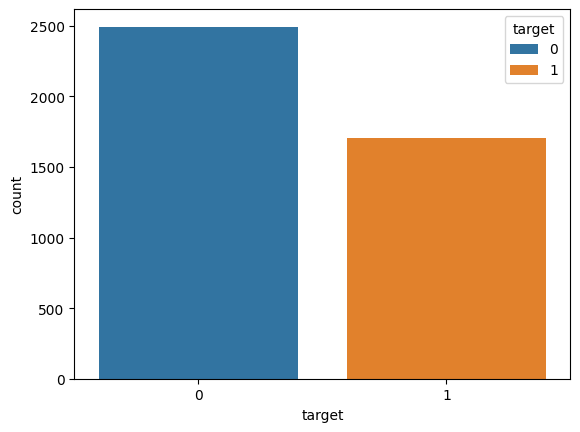

In [ ]:
# Analisis de la distribucion de la variabel target
print(df['target'].value_counts())
sns.countplot(x='target', data=df, hue='target', legend="full")

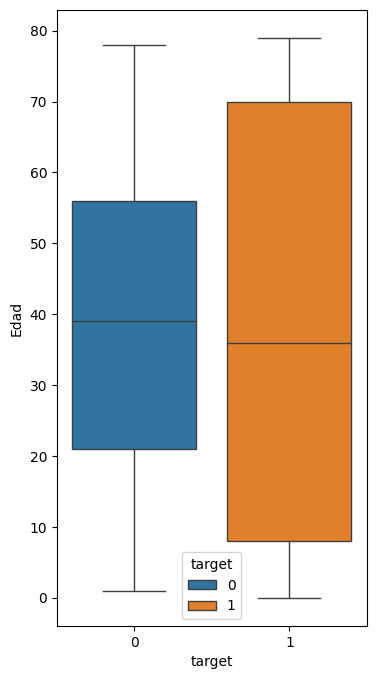

In [ ]:
plt.figure(figsize=(4, 8))
s = sns.boxplot(x='target', y='Edad', data=df, hue="target", legend="full")

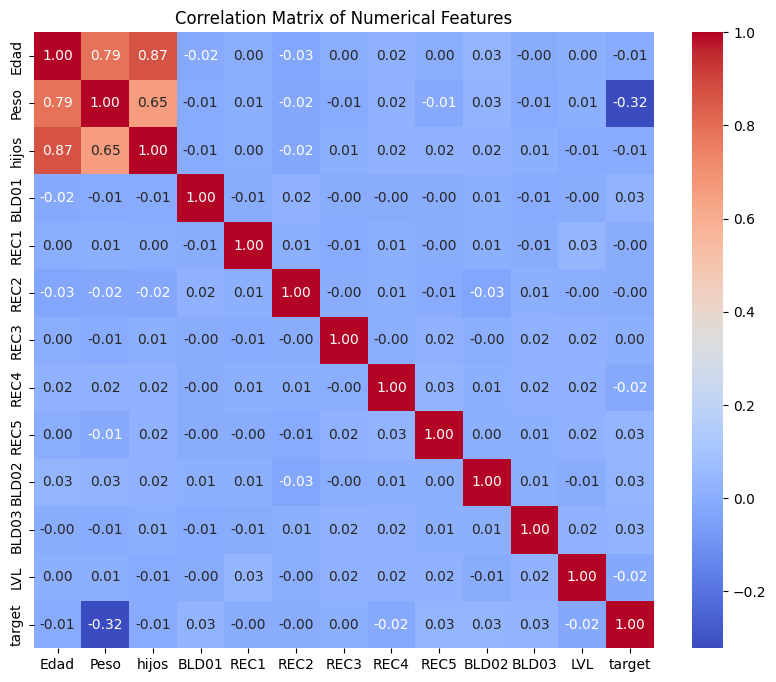

In [ ]:
import matplotlib.pyplot as plt
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

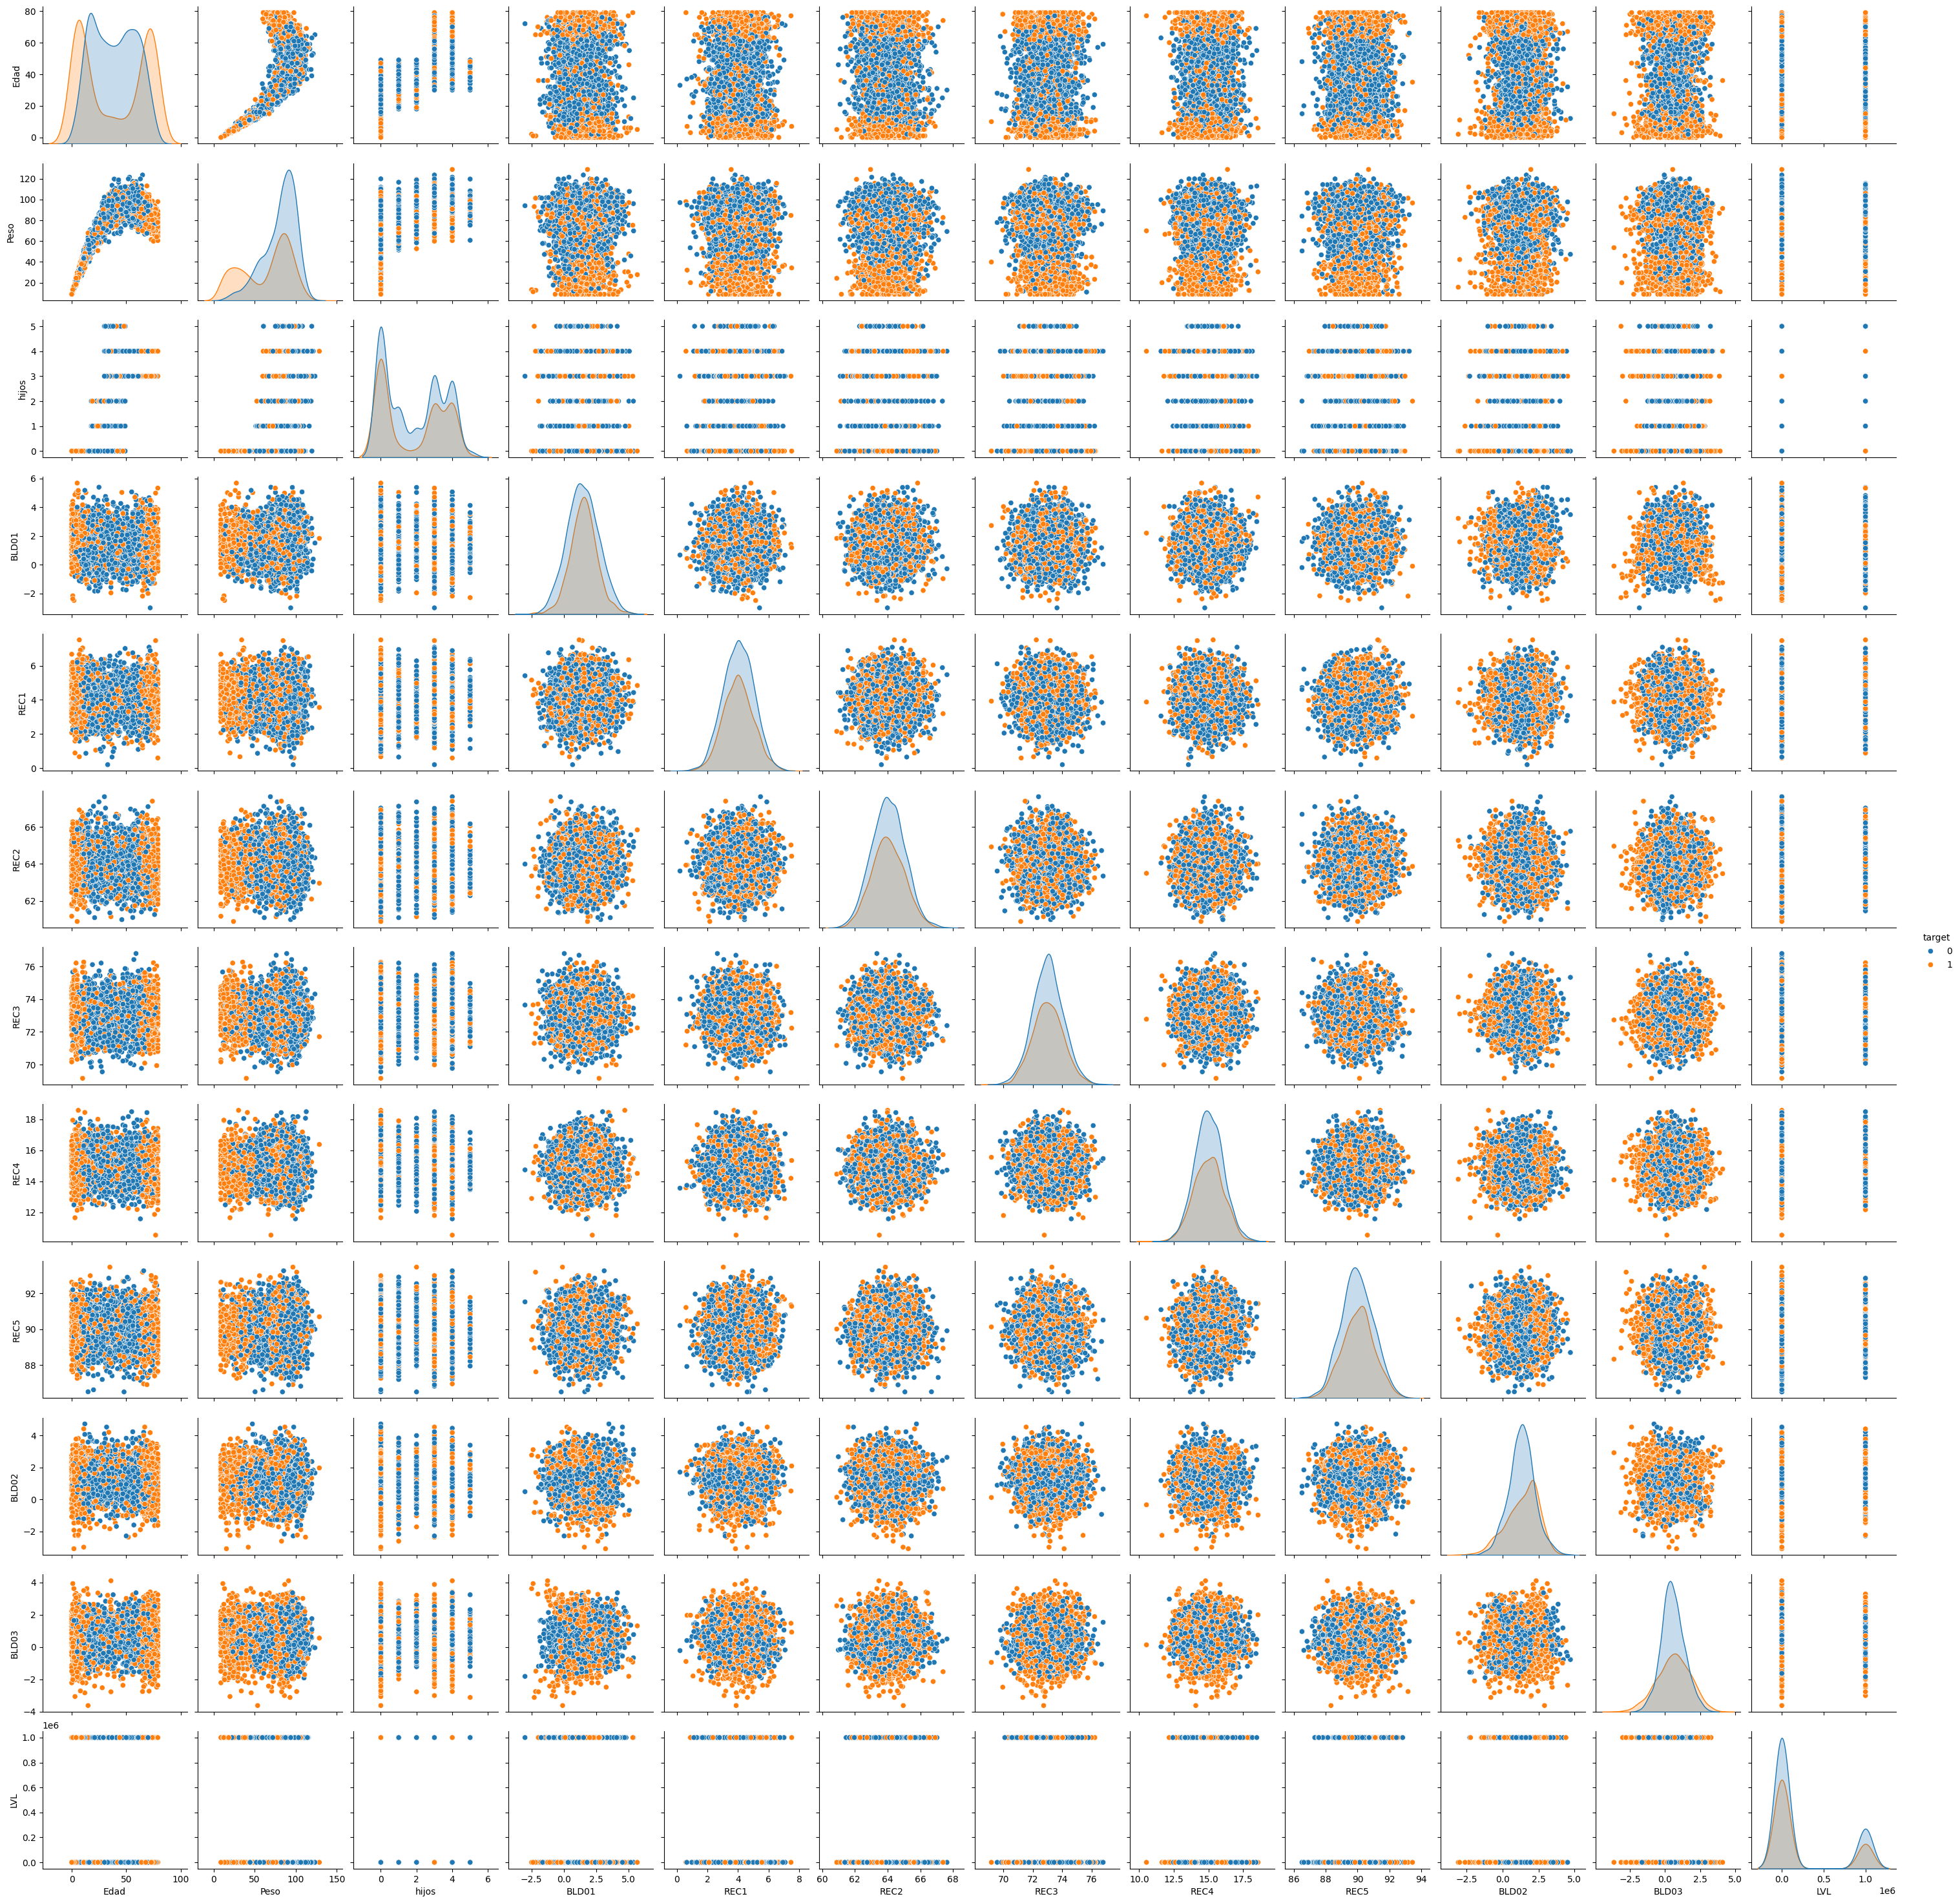

In [ ]:
sns.pairplot(df, hue='target')
plt.show()

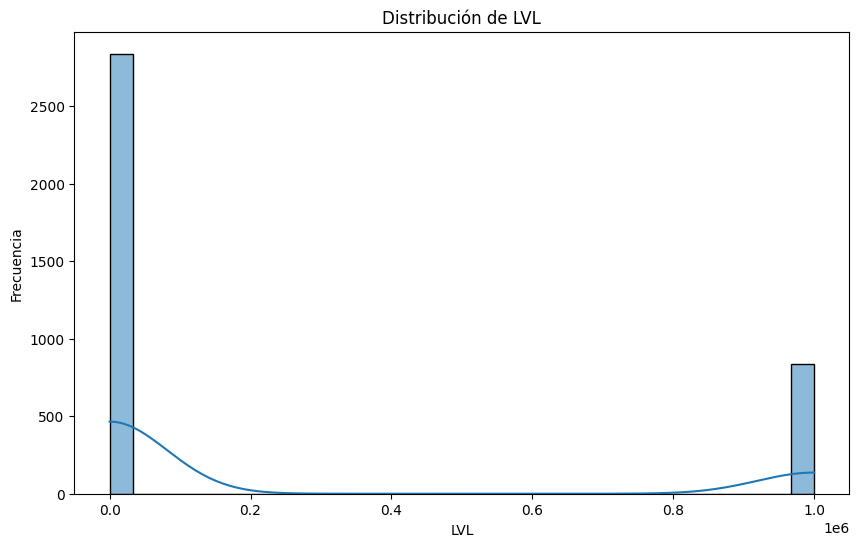

In [ ]:
# prompt: generate a histogram of LVL

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['LVL'], kde=True, bins=30)
plt.title('Distribución de LVL')
plt.xlabel('LVL')
plt.ylabel('Frecuencia')
plt.show()

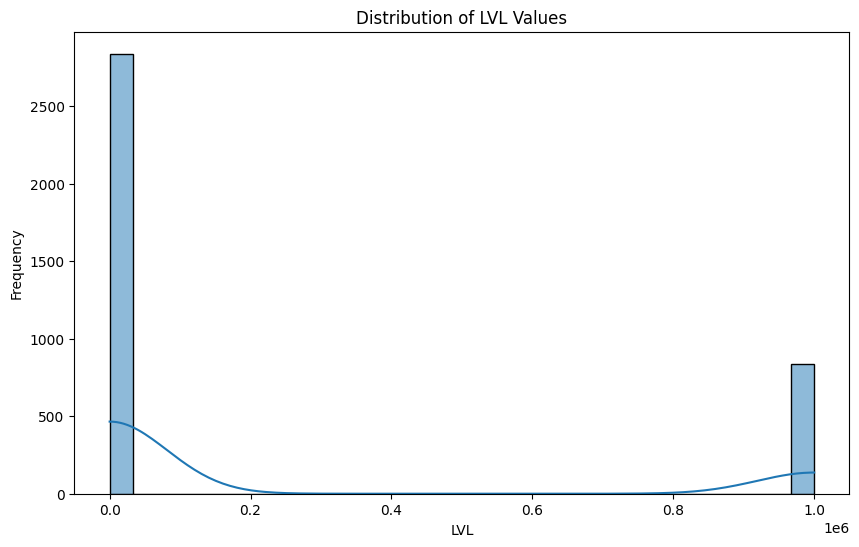

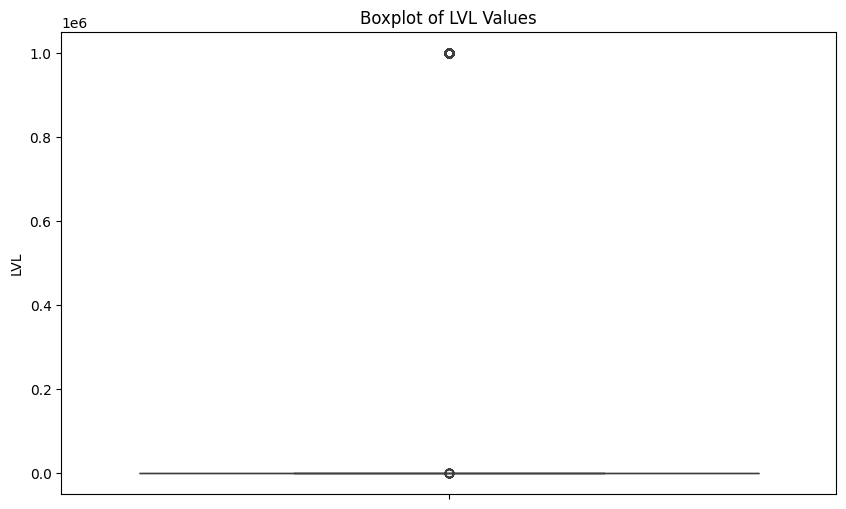

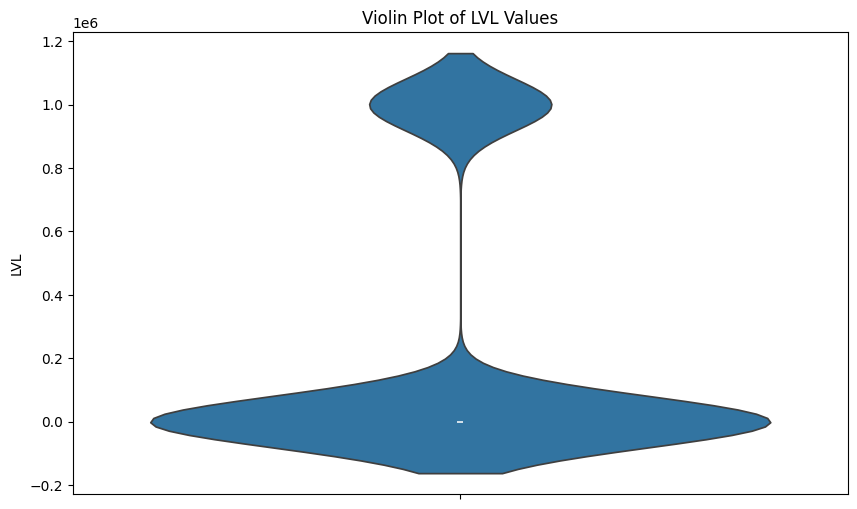

In [ ]:
# prompt: generate a graph that could show how the LVL values are distributed

import matplotlib.pyplot as plt
# Visualize the distribution of LVL
plt.figure(figsize=(10, 6))
sns.histplot(df['LVL'], kde=True, bins=30)
plt.title('Distribution of LVL Values')
plt.xlabel('LVL')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['LVL'])
plt.title('Boxplot of LVL Values')
plt.ylabel('LVL')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(y=df['LVL'])
plt.title('Violin Plot of LVL Values')
plt.ylabel('LVL')
plt.show()

###Imputamos valores nulos

In [ ]:
# Utilizando matrices de correlación, pair-plots, etc. notamos que 'Edad' se puede imputar a partir de 'Peso' e 'hijos' (i.e.: las dos 'features' más cercanas).
# TODO: Qué tal si imputo con KNN con 2 neighbours?

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(n_nearest_features=2)
df['Edad'] = imputer.fit_transform(df[['Edad', 'Peso', 'hijos']])

# Por otro lado, la columna 'Genero' tiene cerca de un 40% de nulos, no sería honesto utilizarla
df = df.drop(columns=['Genero'])

# Finalmente, imputo LVL con base en otros atributos, al igual que para la edad
df['LVL'] = imputer.fit_transform(df[['LVL']])

print(df.isnull().sum())

Edad       0
Peso       0
Laboral    0
hijos      0
BLD01      0
REC1       0
REC2       0
REC3       0
REC4       0
REC5       0
BLD02      0
BLD03      0
LVL        0
target     0
dtype: int64


In [ ]:
df = df.dropna()
print("Tamaño del dataframe luego de eliminar valores nulos : {}".format(df.shape))
print("Tamaño del dataframe luego de eliminar registros con genero Otro : {}".format(df.shape))


Tamaño del dataframe luego de eliminar valores nulos : (4200, 14)
Tamaño del dataframe luego de eliminar registros con genero Otro : (4200, 14)


In [ ]:
# Uso one hot encoding para el atributo 'laboral'

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, dtype=int)
encoded_features = onehot_encoder.fit_transform(df[['Laboral']])
feature_names = onehot_encoder.get_feature_names_out(['Laboral'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=df.index)
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(['Laboral'], axis=1)

print(df.head())

        Edad        Peso  hijos     BLD01      REC1       REC2       REC3  \
0   9.000000   36.410602      0  3.139714  6.929112  63.712640  73.880613   
1  58.000000  115.507184      4  2.953914  4.660136  64.582610  73.669319   
2  74.000000   81.249035      3  1.365200  3.005861  63.613454  75.103984   
3  25.140604   77.985589      0  2.329285  4.344642  64.433115  73.402436   
4   1.000000   13.446208      0 -0.062975  3.938741  65.122602  75.007982   

        REC4       REC5     BLD02     BLD03             LVL  target  \
0  15.087239  90.400193  2.015331  1.633836       51.411632       0   
1  14.503106  90.817947  0.973317 -0.439358  1000000.000000       0   
2  14.077988  91.741638  3.243344  0.380413  1000000.000000       1   
3  15.583846  91.741709  3.188290 -0.226046   227134.359847       0   
4  16.961593  90.668625  2.729202  0.589698       21.627303       1   

   Laboral_Activo  Laboral_Inactivo  Laboral_No_declara  
0               0                 1                 

In [ ]:
from sklearn.preprocessing import StandardScaler

float_cols = df.select_dtypes('float64').columns
scaler = StandardScaler()
df[float_cols] = scaler.fit_transform(df[float_cols])

print(df.head())

       Edad      Peso  hijos     BLD01      REC1      REC2      REC3  \
0 -1.310087 -1.457972      0  1.419903  2.916859 -0.309346  0.838158   
1  0.736466  1.608986      4  1.259974  0.644639  0.559778  0.633716   
2  1.404729  0.280631      3 -0.107525 -1.012002 -0.408436  2.021856   
3 -0.635952  0.154092      0  0.722319  0.328693  0.410428  0.375487   
4 -1.644219 -2.348413      0 -1.336839 -0.077788  1.099246  1.928968   

       REC4      REC5     BLD02     BLD03       LVL  target  Laboral_Activo  \
0  0.068414  0.391485  0.664739  1.057077 -0.579688       0               0   
1 -0.494157  0.802441 -0.363867 -1.024958  1.972940       0               0   
2 -0.903582  1.711104  1.876951 -0.201691  1.972940       1               1   
3  0.546690  1.711173  1.822605 -0.810737  0.000000       0               0   
4  1.873579  0.655549  1.369425  0.008487 -0.579764       1               0   

   Laboral_Inactivo  Laboral_No_declara  
0                 1                   0  
1       

## Entrenamiento por Naive bayes

In [ ]:
# Dividir datos
X = df.drop('target', axis=1)  # o el nombre exacto de la columna clase
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


F2 Score (Naive Bayes): 0.652673950546291
              precision    recall  f1-score   support

           0      0.755     0.703     0.728       499
           1      0.605     0.666     0.634       341

    accuracy                          0.688       840
   macro avg      0.680     0.685     0.681       840
weighted avg      0.694     0.688     0.690       840



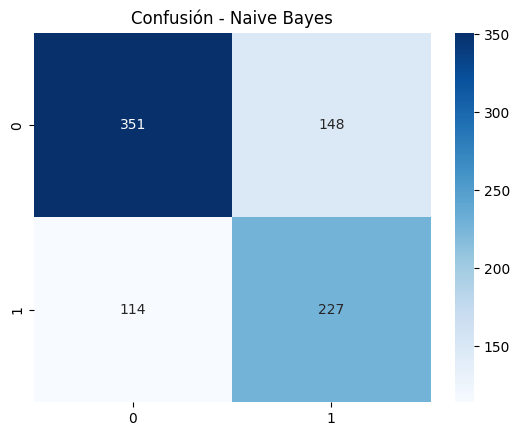

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Evaluar con F2 Score
f2_nb = fbeta_score(y_test, y_pred_nb, beta=2)
print("F2 Score (Naive Bayes):", f2_nb)

# Clasification report
print(classification_report(y_test, y_pred_nb, digits=3))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusión - Naive Bayes')
plt.show()

Valor de 0.653 significa un desempeño aceptable pero no excelente. Captura bien muchos casos positivos, pero aún se pueden mejorar tanto los falsos negativos como los falsos positivos.

F2 Score (Naive Bayes): 0.652673950546291
Mejor var_smoothing: {'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0      0.755     0.703     0.728       499
           1      0.605     0.666     0.634       341

    accuracy                          0.688       840
   macro avg      0.680     0.685     0.681       840
weighted avg      0.694     0.688     0.690       840



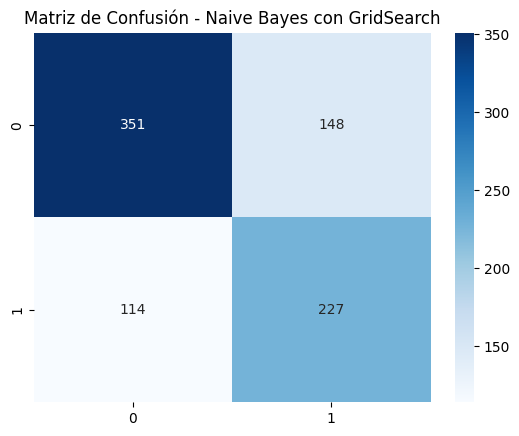

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score
from sklearn.model_selection import GridSearchCV

# 1️ Definir hiperparámetros (solo var_smoothing es útil en GaussianNB)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
model_nb = GaussianNB()

# 3️⃣ Definir scorer con F2
from sklearn.metrics import make_scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# 4️⃣ Aplicar GridSearchCV
grid_nb = GridSearchCV(estimator=model_nb,
                       param_grid=param_grid,
                       scoring=f2_scorer,
                       cv=5,
                       n_jobs=-1)

# 5️⃣ Entrenar con los mejores parámetros
grid_nb.fit(X_train, y_train)
best_nb = grid_nb.best_estimator_

# 6️⃣ Predicción
y_pred_nb = best_nb.predict(X_test)

# 7️⃣ Evaluación
f2_nb = fbeta_score(y_test, y_pred_nb, beta=2)
print("F2 Score (Naive Bayes):", f2_nb)
print("Mejor var_smoothing:", grid_nb.best_params_)

# 8️⃣ Reporte y matriz de confusión
print(classification_report(y_test, y_pred_nb, digits=3))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Naive Bayes con GridSearch')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np
# Probabilidades del modelo
y_probs = model_nb.predict_proba(X_test)[:, 1]

# Calcular curvas de precisión-recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F2 score para cada umbral
f2_scores = (5 * precision * recall) / (4 * precision + recall + 1e-8)
best_thresh = thresholds[np.argmax(f2_scores[:-1])]

print("Mejor umbral para F2 score:", best_thresh)

Mejor umbral para F2 score: 0.030422308801230175


## Evaluacion final - Docente + Alumno

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

PRODUCCION = False
best_clf = None #Asignar aqui el mejor clasificador/pipeline posible (previamente entrenado si es necesario)

#Leemos el dataset de evaluación, simulando producción
if PRODUCCION==False:
    df = pd.read_csv("TP_Virus_Alumnos.csv")
    _, df = train_test_split(df, test_size=0.3, random_state=42)
else:
    df = pd.read_csv("TP_Virus_Evaluacion.csv")
#Dividimos en target y predictoras

X_prod = df.drop("target", axis=1)
y_prod = df["target"]

#Transformaciones en caso de no ser un pipeline completo. Preferiblemente, el mejor pipeline debe incluir todas las transformaciones necesarias.
#Si es pipeline ejecutar el fit (tener en cuenta el tiempo). Si mediante exploración / busqueda exhaustiva se encontró el mejor clasificador
#harcodear sus hiperparametros (Adjuntar código y explicación de como se encontró el mejor clasificador).

#Evaluación final
y_pred = best_clf.predict(X_prod)
print(classification_report(y_prod, y_pred))